In [3]:
import scipy as sp
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [4]:
# Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений,
# какие уникальные значения встречаются.
# Сколько уникальных рекламных кампаний было проведено? 
# Note: использовать идентификатор кампании в базе Х – xyz_campaign_id.

conversion = 'conversion.csv'
conv = pd.read_csv(conversion)
conv.columns = conv.columns.str.lower()
conv.xyz_campaign_id.nunique()

3

In [5]:
conv.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


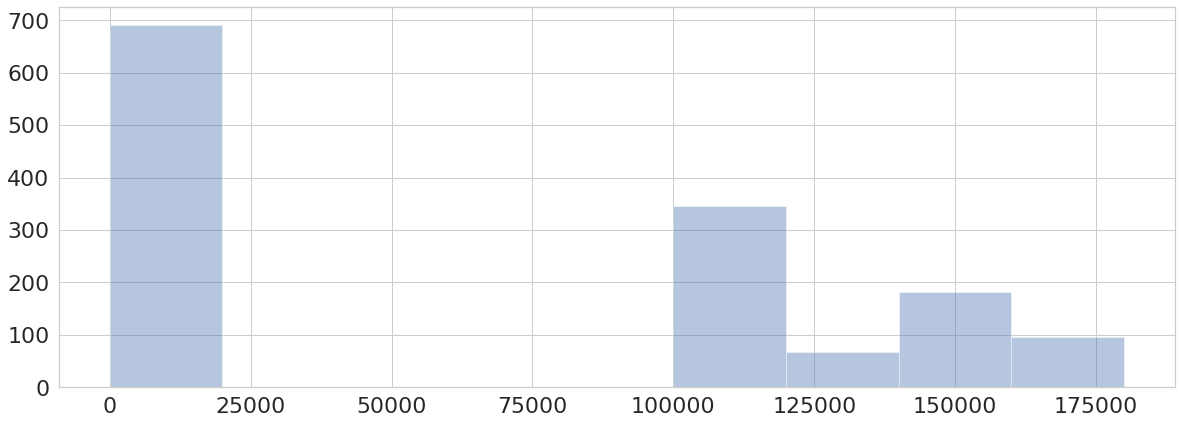

In [6]:
# Постройте график распределения числа показов
# (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook,
# прологарифмировав значения. Выберите верные утверждения:
# Hint: np.log()

fb = conv \
    .groupby(['fb_campaign_id'], as_index = False) \
    .agg({'impressions': 'sum'})
fb.impressions = np.log(fb.impressions)
sns.distplot(fb, kde = False)

In [7]:
# Теперь посчитаем ещё несколько полезных метрик.
# Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

# CTR = clicks/impressions

# Создайте новую колонку, затем посмотрите на описательные статистики.
# В качестве ответа укажите ad_id объявления с наибольшим CTR.

conv['ctr'] = conv.clicks/conv.impressions
maxctr = conv.ctr.idxmax()
conv.iloc[maxctr]

ad_id                      738637
xyz_campaign_id               936
fb_campaign_id             109857
age                         45-49
gender                          F
interest                       24
impressions                   944
clicks                          1
spent                        1.42
total_conversion                1
approved_conversion             0
ctr                    0.00105932
Name: 150, dtype: object

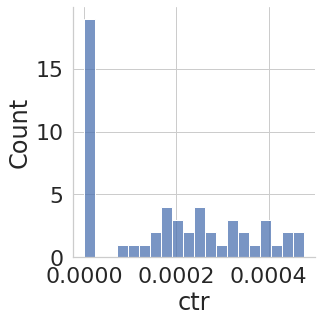

In [19]:
# Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id).
# Какому графику соответствует распределение CTR кампании 916?

camp_916 = conv.query('xyz_campaign_id == "916"')
sns.displot(camp_916.ctr, bins = 20)

In [15]:
# CPC (cost-per-click) – стоимость за клик пользователя по объявлению.
# Рассчитывается путём деления суммы потраченных денег на общее число кликов:
# CPC = spent/clicks
# Выведите описательные статистики для новой переменной, посмотрите на форму распределения.
# В ответе укажите межквартильный размах, округленный до двух знаков после точки.
# Обратите внимание, что в столбце могут встретиться NaN.
# Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать.
# При построении графика необходимо использовать метод .dropna().

conv['cpc'] = conv.spent/conv.clicks
round(sp.stats.iqr(conv.cpc, nan_policy = 'omit'), 2)

0.25

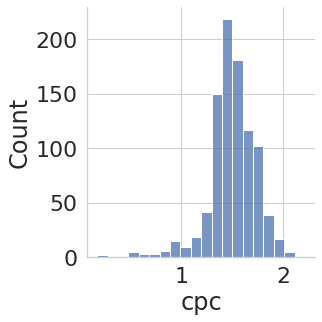

In [20]:
sns.displot(conv.cpc.dropna(), bins = 20)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


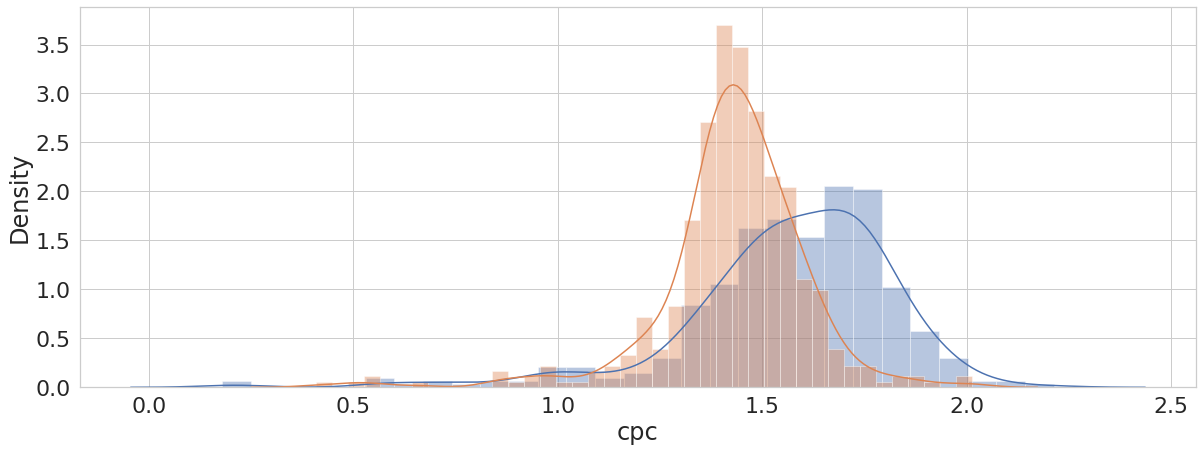

In [26]:
# Визуализируйте CPC с разбивкой по полу пользователей

mgender, fgender = conv.query('gender == "M"'), conv.query('gender == "F"')
sns.distplot(mgender.cpc.dropna())
sns.distplot(fgender.cpc.dropna())

In [34]:
# Конверсия (conversion rate) – отношение числа пользователей,
# совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.
# Посчитайте конверсию из клика в покупку.
# В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки.
# Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20.

conv['cr_%'] = round((conv.approved_conversion/conv.clicks).mul(100), 2)
conv.query('ad_id == "1121814"')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr,cpc,cr,cr_%
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,3.09,3.09
